<div class="alert alert-info">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Week 05: Unsupervised Learning</h3>
  
</div>

# Objectives

- Preprocessing input data
- Dimensionality reduction 
- Principal Component Analysis (PCA)
 - Dimensionality reduction
 - Data Compression
 - Visualization
- Clustering
 - K-Means
 - Other clustering methods

<img src="http://www.snrazavi.ir/imgs/sup_unsup.png" width="75%"/>

<img src="http://www.snrazavi.ir/imgs/unsupervised_workflow.svg" width="50%"/>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting style defaults
import seaborn as sns; sns.set()

## Transformations

- A very basic example is the **rescaling** of our data, which is a requirement for many machine learning algorithms. 
- There exist many different rescaling techniques, and in the following example, we will take a look at a particular method that is commonly called **standardization**.
- Here, we will recale the data so that each feature is:
 - **centered at zero** (mean = 0);
 - with **unit variance** (standard deviation = 0).

For example, if we have a 1D dataset with the values [1, 2, 3, 4, 5], the standardized values are

- 1 -> -1.41
- 2 -> -0.71
- 3 -> 0.0
- 4 -> 0.71
- 5 -> 1.41

computed via the equation $x_{standardized} = \frac{x - \mu_x}{\sigma_x}$,
where $\mu$ is the sample mean, and $\sigma$ the standard deviation, respectively.

In [2]:
a = np.array([1, 2, 3, 4, 5])
a_standardized = (a - a.mean()) / a.std()
print(a_standardized)

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


In [3]:
print(a_standardized.mean())
print(a_standardized.std())

0.0
0.9999999999999999


## Using `sklearn` for transformations

Although standardization is a most basic preprocessing procedure -- as we've seen in the code snipped above -- scikit-learn implements a `StandardScaler` class for this computation. 

To get some more practice with scikit-learn's "Transformer" interface, let's start by loading the iris dataset and rescale it:

### Loading Iris dataset

<img src="http://www.snrazavi.ir/imgs/iris.png" width="70%">

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)

(112, 4)


#### Mean and Standard Deviation of iris dataset

The iris dataset is not "centered" that is it has non-zero mean and the standard deviation is different for each component:

In [5]:
print("mean : %s " % X_train.mean(axis=0))
print("standard deviation : %s " % X_train.std(axis=0))

mean : [5.88660714 3.05178571 3.79642857 1.22321429] 
standard deviation : [0.86741565 0.43424445 1.79264014 0.77793019] 


#### Standardization

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

- As with the classification and regression algorithms, we call ``fit`` to learn the model from the data. 
- As this is an unsupervised model, we only pass ``X``, not ``y``. This simply estimates mean and standard deviation.

#### `fit()`

In [7]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

#### `transform()`

Now we can rescale our data by applying the ``transform`` (not ``predict``) method:

In [8]:
X_train_scaled = scaler.transform(X_train)

In [9]:
print("mean : %s " % X_train_scaled.mean(axis=0))
print("standard deviation : %s " % X_train_scaled.std(axis=0))

mean : [ 1.21331516e-15 -4.41115398e-17  7.13714802e-17 -3.66770106e-16] 
standard deviation : [1. 1. 1. 1.] 


It's important to note that the same transformation is applied to the training and the test set. That has the consequence that usually the mean of the test data is not zero after scaling:

In [10]:
X_test_scaled = scaler.transform(X_test)
print("mean test data: %s" % X_test_scaled.mean(axis=0))

mean test data: [-0.19692712  0.05042896 -0.08461917 -0.12117658]


It is important for the training and test data to be transformed in exactly the same way, for the following processing steps to make sense of the data, as is illustrated in the figure below:

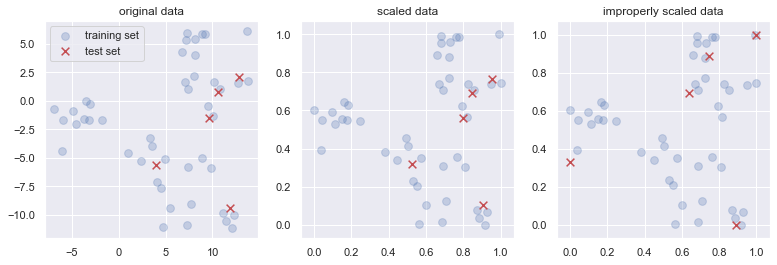

In [11]:
from figs import plot_scaling
plot_scaling.plot_relative_scaling()

### Other Scalers
- `MinMaxScaler`
- `RobustScaler`
- `Normalizer`

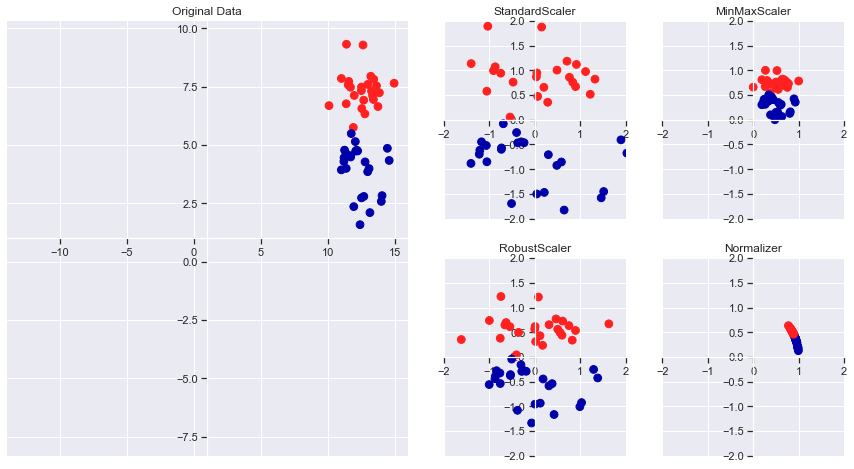

In [12]:
plot_scaling.plot_scaling()

# Principal Component Analysis (PCA)

For a complete introduction, please see [Dimensionality Reduction](http://www.snrazavi.ir/wp-content/uploads/2017/10/13-DimensionalityReduction-2016.pdf)

Here we'll explore **Principal Component Analysis**, which is an extremely useful linear dimensionality reduction technique.

The goal is to reduce the size (dimensionality) of a dataset while capturing most of its information. 

There are many reason why dimensionality reduction can be useful: 
- It can reduce the computational cost when running learning algorithms,
- decrease the storage space, and 
- may help with the so-called "curse of dimensionality," 

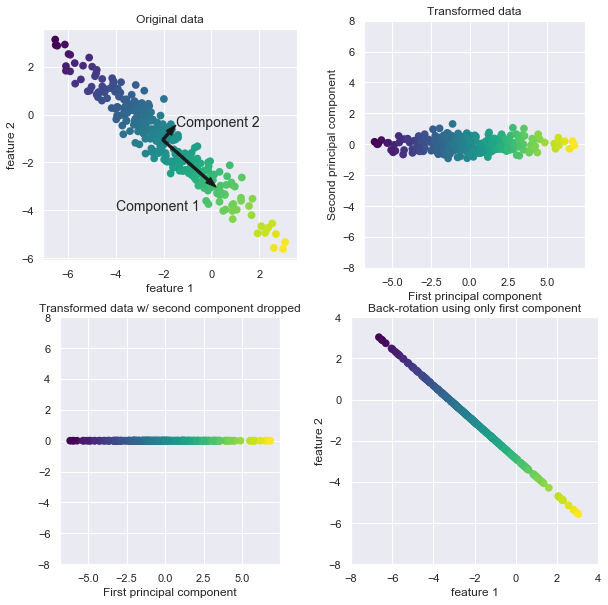

In [13]:
from figs import  plot_pca
plot_pca.plot_pca_illustration()

### Example use of PCA
It's easiest to visualize by looking at a two-dimensional dataset:

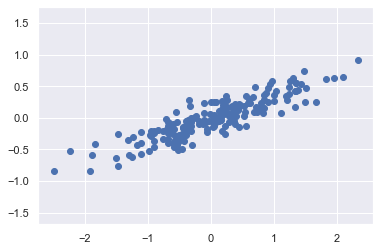

In [14]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

We can see that there is a definite trend in the data. What PCA seeks to do is to find the **Principal Axes** in the data, and explain how important those axes are in describing the data distribution:

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [16]:
v1 = pca.components_[:, 0]
v2 = pca.components_[:, 1]
print(v1)
print(v2)

[-0.94446029 -0.32862557]
[-0.32862557  0.94446029]


In [17]:
print(np.dot(v1, v2))

0.0


In [18]:
print(np.linalg.norm(v1))
print(np.linalg.norm(v2))

1.0
1.0


To see what these numbers mean, let's view them as vectors plotted on top of the data:

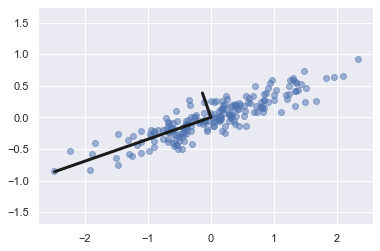

In [19]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

Notice that one vector is longer than the other. In a sense, this tells us that that direction in the data is somehow more "important" than the other direction.
The explained variance quantifies this measure of "importance" in direction.

Another way to think of it is that the second principal component could be **completely ignored** without much loss of information! Let's see what our data look like if we only keep 95% of the variance:

In [20]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50%! Let's see what the data look like after this compression:

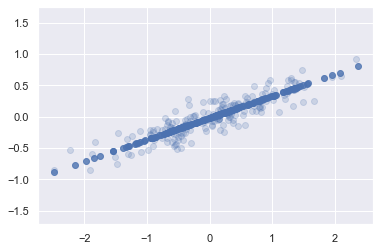

In [21]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'bo', alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.  We see that after truncating 5% of the variance of this dataset and then reprojecting it, the "most important" features of the data are maintained, and we've compressed the data by 50%!

This is the sense in which "dimensionality reduction" works: if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting complicated models to the data.

### Application of PCA to Digits for Visualization

The dimensionality reduction might seem a bit abstract in two dimensions, but the projection and dimensionality reduction can be extremely useful when visualizing high-dimensional data.  Let's take a quick look at the application of PCA to the digits data we looked at before:

<img src="http://www.snrazavi.ir/imgs/digits_2d.jpg" width="50%"/>

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
print(X.shape)

(1797, 64)


In [23]:
pca = PCA(n_components=2)  # project from 64 to 2 dimensions
X_proj = pca.fit_transform(X)
print(X.shape)
print(X_proj.shape)

(1797, 64)
(1797, 2)


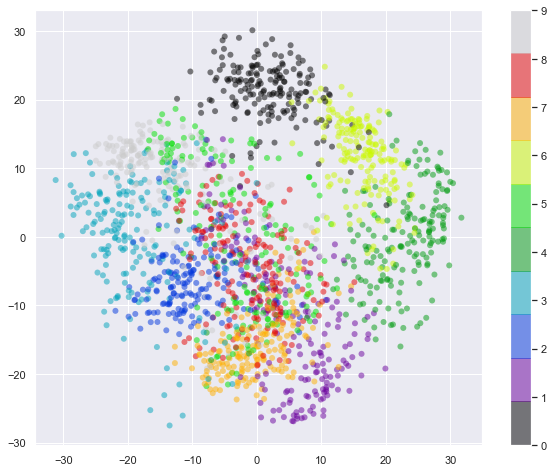

In [24]:
plt.figure(figsize=(10.0, 8.0))
plt.scatter(X_proj[:, 0], X_proj[:, 1], 
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

This gives us an idea of the relationship between the digits. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits, **without reference** to the labels.

### What do the Components Mean?

PCA is a very useful dimensionality reduction algorithm, because it has a very intuitive interpretation via *eigenvectors*.
The input data is represented as a vector: in the case of the digits, our data is

$$
x = [x_1, x_2, x_3 \cdots]
$$

but what this really means is

$$
image(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots
$$

If we reduce the dimensionality in the pixel space to (say) 6, we recover only a partial image:

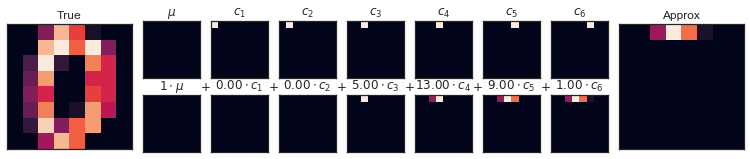

In [25]:
from figs.figures import plot_image_components

sns.set_style('white')
plot_image_components(digits.data[0])

But the pixel-wise representation is not the only choice. We can also use other *basis functions*, and write something like

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

What PCA does is to choose optimal **basis functions** so that only a few are needed to get a reasonable approximation.
The low-dimensional representation of our data is the coefficients of this series, and the approximate reconstruction is the result of the sum:

In [26]:
from figs.figures import plot_pca_interactive
plot_pca_interactive(digits.data)

interactive(children=(IntSlider(value=0, description='i', max=1796), Output()), _dom_classes=('widget-interact…

Here we see that with only six PCA components, we recover a reasonable approximation of the input!

Thus we see that PCA can be viewed from two angles. It can be viewed as **dimensionality reduction**, or it can be viewed as a form of **lossy data compression** where the loss favors noise. In this way, PCA can be used as a **filtering** process as well.

### Choosing the Number of Components

But how much information have we thrown away?  We can figure this out by looking at the **explained variance** as a function of the components:

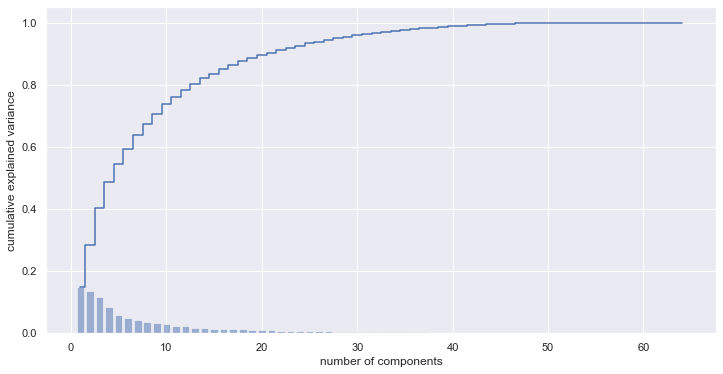

In [31]:
sns.set()
plt.figure(figsize=(12, 6))

pca = PCA().fit(X)  # Notice

plt.bar(range(1, len(pca.explained_variance_ratio_) + 1),
        pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')

plt.step(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         where='mid')

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

### PCA as data compression

As we mentioned, PCA can be used for is a sort of data compression. Using a small ``n_components`` allows you to represent a high dimensional point as a sum of just a few principal vectors.

Here's what a single digit looks like as you change the number of components:

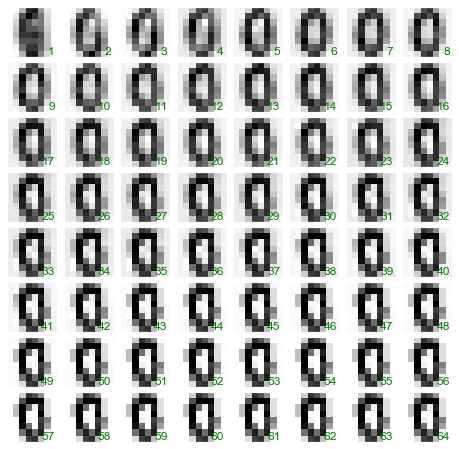

In [32]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[20:21]))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, '{0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

Let's take another look at this by using IPython's ``interact`` functionality to view the reconstruction of several images at once:

In [33]:
from ipywidgets import interact

def plot_digits(n_components):
    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 1, 1, frameon=False, xticks=[], yticks=[])
    nside = 10
    
    pca = PCA(n_components).fit(X)
    X_proj = pca.inverse_transform(pca.transform(X[:nside ** 2]))
    X_proj = np.reshape(X_proj, (nside, nside, 8, 8))
    total_var = pca.explained_variance_ratio_.sum()
    
    im = np.vstack([np.hstack([X_proj[i, j] for j in range(nside)])
                    for i in range(nside)])
    plt.imshow(im)
    plt.grid(False)
    plt.title("n = {0}, variance = {1:.2f}".format(n_components, total_var), size=18)
    plt.clim(0, 16)
    
interact(plot_digits, n_components=np.arange(1, 64), nside=[1, 8]);

interactive(children=(Dropdown(description='n_components', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,…

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
        Visualize the iris dataset using the first two principal components, and compare this visualization to using two of the original features.
      </li>
    </ul>
</div>

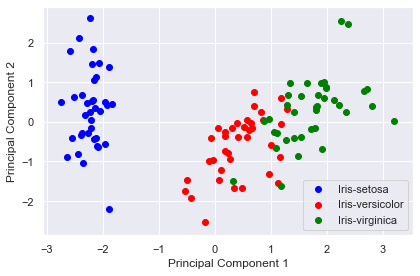

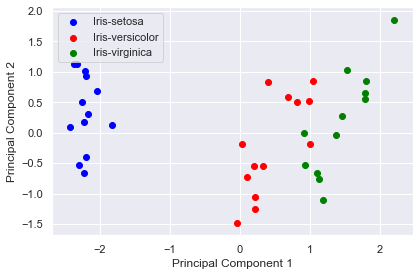

In [34]:
# %load solutions/07A_iris-pca.py
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state=0,
                                                    stratify=iris.target)

sc = StandardScaler()
sc.fit(X_train)
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(sc.transform(X_train))
X_test_pca = pca.transform(sc.transform(X_test))

for X, y in zip((X_train_pca, X_test_pca), (y_train, y_test)):

    for i, annot in enumerate(zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                                  ('blue', 'red', 'green'))):
        plt.scatter(X[y==i, 0],
                    X[y==i, 1],
                    label=annot[0],
                    c=annot[1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


<div class="alert alert-success">
    <b>PROGRAMMING ASSGNMENT 2: PCA for face dataset</b>:
     <ul>
      <li>
        Apply PCA on faces to reduce dimensionality from 1024 to 100; then, draw some random faces (say, 100) and also the same faces approximated using only 100 components. 
      </li>
      <li>
          Also compute how much information is retained after using PCA with 100 components.
      </li>
    </ul>
</div>

<table>
    <tr>
        <td><h4 align="center">Original Faces</h4></td>
        <td><h4 align="center">Approximated (k=100)</h4></td>
    </tr>

    <tr>
        <td><img src="http://www.snrazavi.ir/imgs/faces_original.png" width="80%"/></td>
        <td><img src="http://www.snrazavi.ir/imgs/faces_approx.png" width="80%"/></td>
    </tr>
</table>

# Unsupervised Learning: Clustering
For a comlete introduction please see [Clustering](http://www.snrazavi.ir/wp-content/uploads/2017/10/12-UnsupervisedLearning-2016.pdf)

Clustering is the task of gathering samples into groups of similar
samples according to some predefined similarity or distance (dissimilarity)
measure, such as the Euclidean distance.

<img src="http://www.snrazavi.ir/imgs/clustering.png" width="70%"/>

Here are some common applications of clustering algorithms:

- Compression for data reduction
- Summarizing data as a reprocessing step for recommender systems
- Similarly:
   - grouping related web news (e.g. Google News) and web search results
   - grouping related stock quotes for investment portfolio management
   - building customer profiles for market analysis
- Building a code book of prototype samples for unsupervised feature extraction

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
print(X.shape)

In [ ]:
plt.scatter(X[:, 0], X[:, 1]);

## K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

### Getting cluster labels

- We can get the cluster labels either by calling fit and then accessing the ``labels_`` attribute of the K means estimator, or 
- by calling ``fit_predict``.

Either way, the result contains the ID of the cluster that each point is assigned to.

In [ ]:
labels = kmeans.fit_predict(X)
print(labels)

Let's visualize the assignments that have been found

In [ ]:
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.cool, c=labels);

### Choosing number of clusters

- One of the "short-comings" of K-means is that we have to specify the number of clusters, which we often don't know *apriori*. 
- For example, let's have a look what happens if we set the number of clusters to 2 in our synthetic 3-blob dataset:

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.cool, c=labels);

In [ ]:
print(kmeans.cluster_centers_)

#### The Elbow Method

The Elbow method is a "rule-of-thumb" approach to finding the optimal number of clusters. Here, we look at the cluster dispersion for different values of k:

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Then, we pick the value that resembles the "pit of an elbow." As we can see, this would be **k=3** in this case, which makes sense given our visual expection of the dataset previously.

We can easily create a dataset that has non-isotropic clusters, on which kmeans will fail:

In [ ]:
plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs");

## Some Notable Clustering Routines

The following are two well-known clustering algorithms. 

- `sklearn.cluster.KMeans`: <br/>
    The simplest, yet effective clustering algorithm. Needs to be provided with the
    number of clusters in advance, and assumes that the data is normalized as input
    (but use a PCA model as preprocessor).
- `sklearn.cluster.MeanShift`: <br/>
    Can find better looking clusters than KMeans but is not scalable to high number of samples.
- `sklearn.cluster.DBSCAN`: <br/>
    Can detect irregularly shaped clusters based on density, i.e. sparse regions in
    the input space are likely to become inter-cluster boundaries. Can also detect
    outliers (samples that are not part of a cluster).
- `sklearn.cluster.AffinityPropagation`: <br/>
    Clustering algorithm based on message passing between data points.
- `sklearn.cluster.SpectralClustering`: <br/>
    KMeans applied to a projection of the normalized graph Laplacian: finds
    normalized graph cuts if the affinity matrix is interpreted as an adjacency matrix of a graph.
- `sklearn.cluster.Ward`: <br/>
    Ward implements hierarchical clustering based on the Ward algorithm,
    a variance-minimizing approach. At each step, it minimizes the sum of
    squared differences within all clusters (inertia criterion).

Of these, Ward, SpectralClustering, DBSCAN and Affinity propagation can also work with precomputed similarity matrices.

For more information, please see [here](http://scikit-learn.org/stable/modules/clustering.html#clustering)

<img src="http://www.snrazavi.ir/imgs/cluster_comparison.png" width="100%"/>

<div class="alert alert-success">
    <b>EXERCISE: digits clustering</b>:
     <ul>
      <li>
      Perform K-means clustering on the digits data, searching for ten clusters.
Visualize the cluster centers as images (i.e. reshape each to 8x8 and use
``plt.imshow``)  Do the clusters seem to be correlated with particular digits?
      </li>
      <li>
      Visualize the projected digits as in we did in PCA example, but this time use the
cluster labels as the color.  What do you notice?
      </li>
    </ul>
</div>

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

# your code here
# ...

In [ ]:
# %load solutions/08B_digits_clustering.py
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(digits.data)

print(kmeans.cluster_centers_.shape)

#------------------------------------------------------------
# visualize the cluster centers
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(kmeans.cluster_centers_[i].reshape((8, 8)),
              cmap=plt.cm.binary)
    ax.grid(False)
    ax.axis('off')
    
#------------------------------------------------------------
# visualize the projected data
from sklearn.manifold import Isomap
X_iso = Isomap(n_neighbors=10).fit_transform(digits.data)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=digits.target);

In [ ]:
from figs.figures import plot_kmeans_interactive
plot_kmeans_interactive();

<div class="alert alert-success">
    <b>PROGRAMMING ASSIGNMENT 3: image compression using k-means</b>:
     <ul>
      <li>
          See Piazza for a complete defenition of this programming assignment. 
      </li>
      <li>
      Visualize the projected digits as in we did in PCA example, but this time use the
cluster labels as the color.  What do you notice?
      </li>
    </ul>
</div>

<img src="http://www.snrazavi.ir/imgs/k-means_image_compression.png" width="80%"/>